## Metoda najmniejszych kwadratów, aproksymacja wielomianowa
###  Aproksymacja wielomianowa

Cel:

 - Zastosowanie algebry liniowej do prostego przypadku aproksymacji funkcji wielomianami $x^n$.
 - Sage: Wykorzystanie technik operacji na macierzach i danych.

Mamy dane punkty $(x_1,y_1),\dots,(x_n,y_n)$. Szukamy wielomianu stopnia $n-1$ przechodzącego przez te punkty.

 - $c_i$ to współczynniki wielomianu</li>


In [2]:
var('x')
xs=[]
ys=[]
cs=[]
n_pkts = 4
for i in range(1,n_pkts+1):
    xs.append(var('x%d' % i))
    ys.append(var('y%d' % i))
    cs.append(var('c%d' % i))
X=vector([x^i for i in range(n_pkts)]    )
A=(matrix([ X.subs(x==xx) for xx in xs] ))
b=(vector(ys).column())
c=(vector(cs).column())
table([["macierz ukladu liniowego: $A$ ","$\cdot$","$c$","$= b$"],[A,"$\cdot$",c,b]],header_row=True)

macierz ukladu liniowego:,,,
,,,


<p>Bierzemy konkretne punkty:</p>

In [3]:
points=[ [(i/pi/3.0).n(),1+0.01*sin(i/pi/3.0).n()] for i in range(13)]

In [4]:
points=[[1,1],[2,2],[3,4]]
points

[[1, 1], [2, 2], [3, 4]]

x,y
,
,
,


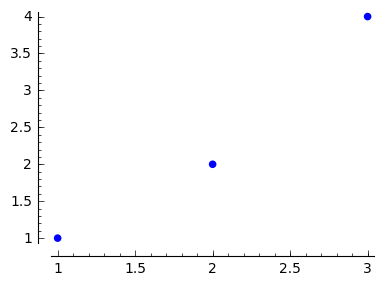

In [5]:
show(table(  [["x","y"]]+points, header_row=True))
pkt_plt=point(points,size=30)
show(pkt_plt,figsize=4)

In [6]:
Alst=[]
blst=[]
Xlst=[]
for k in range(len(points)):
    mk=[]
    for j in range(len(points)):
        mk+=[points[k][0]^j]
    Alst+=[mk]
    blst+=[points[k][1]]
    Xlst+=[x^k]

In [7]:
points

[[1, 1], [2, 2], [3, 4]]

In [8]:
N = len(points)
A = matrix( [[ x_^i for i in range(N)] for x_,y_ in points] )
show(A)

[1 1 1]
[1 2 4]
[1 3 9]

In [9]:
[y_ for x_,y_ in points]

[1, 2, 4]

In [10]:
A = matrix(RDF,Alst)
b = vector(blst)
X = vector(Xlst)

<p>Rozwiązujemy na $c_i$:</p>

In [11]:
c=A\b

In [12]:
table([["macierz ukladu liniowego:  $A$","$\cdot$","$c$","$= b$"],[A,"$\cdot$",c,b]],header_row=True)

macierz ukladu liniowego:,,,
,,,


In [13]:
X

(1, x, x^2)

0.5*x^2 - 0.5*x + 1.0

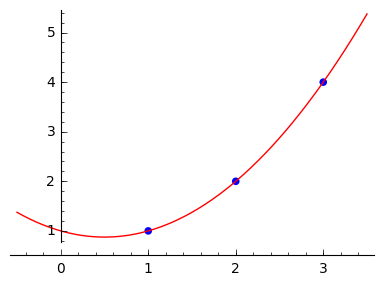

In [14]:
wielomian= c.dot_product(X)
show(wielomian)
plot(wielomian,(-.5,3.5),color='red',figsize=4)+pkt_plt

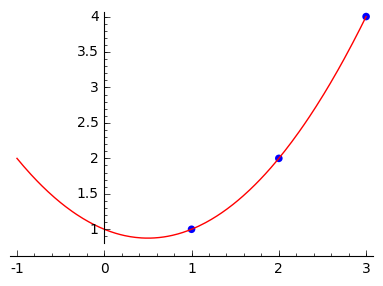

In [15]:
def pol(x,C):
    wartosc=0
    for i,c in enumerate(C):
        wartosc+=x^i*c
    return wartosc
plot(lambda x:pol(x,c),(x,-1,3),color='red',figsize=4)+pkt_plt

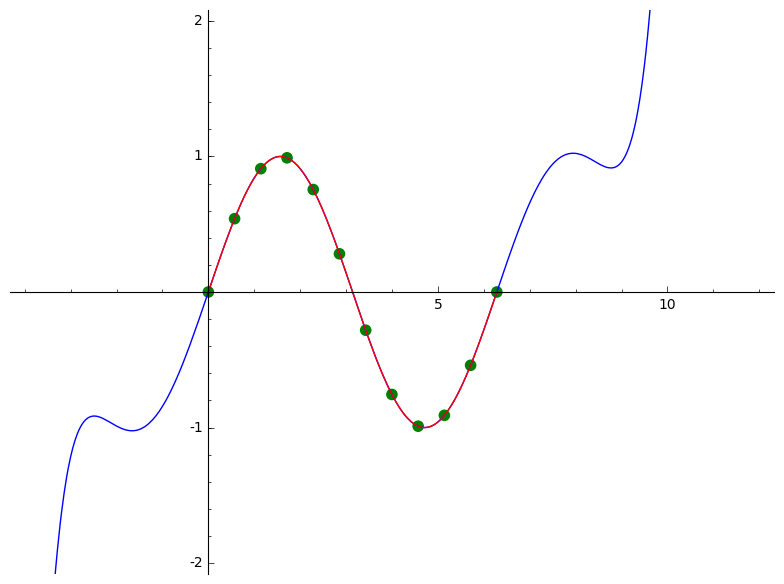

In [16]:
var('x')
n=12
l=[ ( 2*pi.n()/(n-1)*i   ,   sin(2*pi.n()/(n-1)*i)  ) for i in range(n)]
R = PolynomialRing(RR, 'x')
L = R.lagrange_polynomial(l)
pp=L.plot(-4,12,ymin=-2,ymax=2)+plot(sin(x),(x,0,2*pi),color='red')+point(l,color='green',size=70)
pp.show()

In [17]:
var('y')
R.<x> = PolynomialRing(RR)
L = R.lagrange_polynomial(l)
print type(L(y))
print type(L)
print type(L(x))
print type(x)

<type 'sage.symbolic.expression.Expression'>
<type 'sage.rings.polynomial.polynomial_real_mpfr_dense.PolynomialRealDense'>
<type 'sage.rings.polynomial.polynomial_real_mpfr_dense.PolynomialRealDense'>
<type 'sage.rings.polynomial.polynomial_real_mpfr_dense.PolynomialRealDense'>


In [18]:
var('x')
f(x)=exp(-x)*sin(x)
f(1.1)

0.296657159743355

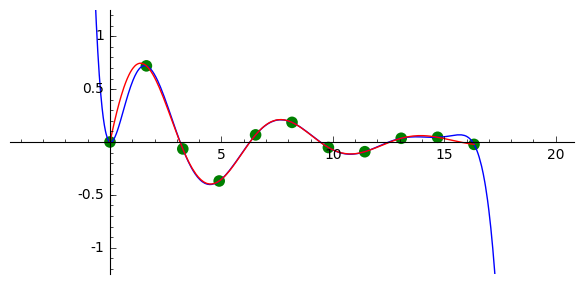

In [19]:
from ipywidgets import interact
var('xx')
f(xx)=sin(xx)
@interact(n=(2,20),a=(0.2,5,0.2))
def sinpoly(n,a):
    
    l = [ (a*2*pi.n()/(n-1)*i,exp(-0.2*a*2*pi.n()/(n-1)*i)*sin(a*2*pi.n()/(n-1)*i)) for i in range(n)]
    R = PolynomialRing(RR, 'x')
    L = R.lagrange_polynomial(l)
    plt = L.plot(-4,a*2*pi+4,ymin=-1.2,ymax=1.2)+plot(exp(-0.2*x)*sin(x),(x,0,2*pi*a),color='red')+point(l,color='green',figsize=(6,3),size=70)
    plt.show()

In [20]:
n=5
a=1.0
l=[ (a*2*pi.n()/(n-1)*i,f(a*2*pi.n()/(n-1)*i)) for i in range(n)]

<h2>Metoda najmniejszych kwadratów</h2>
<p>Cel:</p>
<ol>
<li>Zrozumienie podstaw metody najmniejszych kwadratów</li>
<li>Sage: umiejętność operacji na macierzach i danych.</li>
</ol>
<p> </p>
<p>Zamiast:</p>
<p>$$  A x =  b$$</p>
<p>rozwiązujemy</p>
<p>$$ A^T A x = A^T b.$$</p>
<p>Inaczej mówiąc, niech błąd:</p>
<p>$$  r=b-A x$$</p>
<p>leży w lewym jądrze A:</p>
<p>$$A^T r =A^T( b-Ax) = A^T b-A^TAx = 0.$$</p>
<p> </p>
<p>$$ A^T A x = A^T b.$$</p>
<ol> </ol>

In [21]:
var('x y t')
points=[[0,1],[2,0],[3,4],[5,6]]

In [22]:
N=len(points)

X=vector([1,x])
M=len(X)

var('x')
xs=[]
ys=[]
cs=[]
for i in range(1,N+1):
    xs.append(var('x%d' % i))
    ys.append(var('y%d' % i))
for i in range(1,M+1):    
    cs.append(var('c%d' % i))
    

A=(matrix([ X.subs(x==xx) for xx in xs] ))
b=(vector(ys).column())
c=(vector(cs).column())


ATA=A.transpose()*A
ATb=A.transpose()*b

table([["  $A$","$\cdot$","$c$","$= b$ "],[A,"$\cdot$",c,b],[ATA,"$\cdot$",c,ATb]],header_row=True)

,,,
,,,
,,,


x,y
,
,
,
,


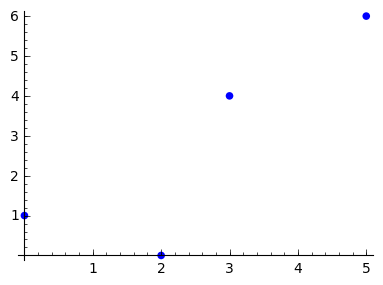

In [23]:
points=[[0,1],[2,0],[3,4],[5,6]]
show(table(  [["x","y"]]+points, header_row=True))
pkt_plt=point(points,size=30)
show(pkt_plt,figsize=4)

In [24]:
Alst=[]
blst=[]

for k in range(N):
    mk=[]
    for j in range(M):
        mk+=[points[k][0]^j]
    Alst+=[mk]
    blst+=[points[k][1]]

In [25]:
A=matrix(RDF,Alst)
b=vector(blst)

ATA=A.transpose()*A
ATb=A.transpose()*b

In [26]:
table([["$A$","$\cdot$","$c$","$= b$"],[A,"$\cdot$",c,b],[ATA,"$\cdot$",c,ATb]],header_row=True)

,,,
,,,
,,,


In [27]:
c=ATA\ATb

In [28]:
c

(-0.03846153846153797, 1.1153846153846152)

In [29]:
wielomian= c.dot_product( X )
show(wielomian)

1.1153846153846152*x - 0.03846153846153797

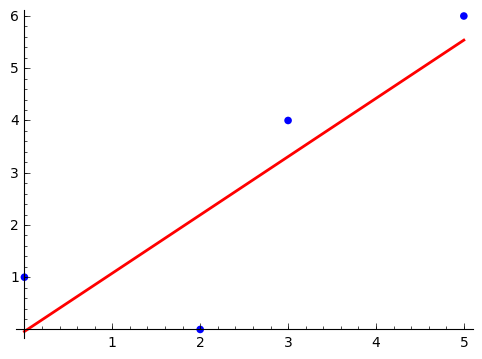

In [30]:
pkt_plt+plot(wielomian, (x,0,5),color='red',thickness=2,figsize=5)

<h2>Praktyczne stosowanie interpolacji i aproksymacji w Sage</h2>
<h3></h3>
<p> </p>
<p>Zagadnienie Lagrange'a w Sage:</p>

In [31]:
pts=[[1,1],[2,2],[3,4]]
R = PolynomialRing(QQ, 'x')    ### x - bedzie generatorem wielomianów nad ciałem liczb wymiernych, 
                               ### R - będzie objektem reprezentującym to ciało
L = R.lagrange_polynomial(pts) ### interpolacja Lagrange'a jest zaimplementowana w R 
show(L(x).expand() )

1/2*x^2 - 1/2*x + 1

<h2>Przykład: zjawisko Rungego</h2>

<p>Rozważmy funkcję:</p>

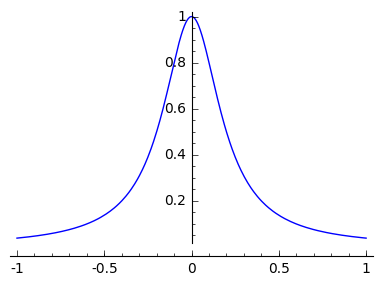

In [32]:
f(x)= 1/(1+25*x^2)
plot(f,(-1,1), figsize=4)

Jej pochodne przyjmują duże wartości w $0$:

In [33]:
[ diff(1/(1+25*x^2),x,i).subs({x:0}) for i in range(1,7) ]

[0, -50, 0, 15000, 0, -11250000]

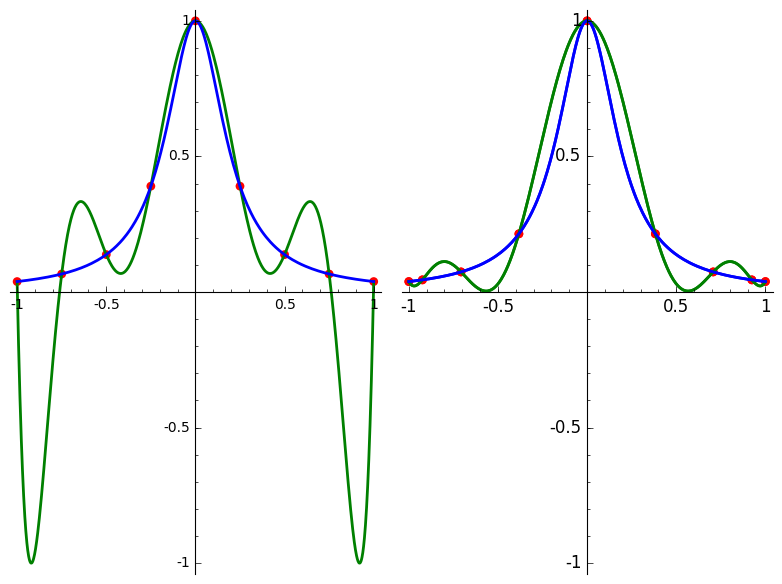

In [44]:
@interact(n_pkt=(1,20,1))
def inter1(n_pkt):
    x0  = 1
    f(x)= 1/(1+25*x^2)
    x_bounds=(-1,1)
    p   = plot(f,x_bounds, thickness=2)
    
    #n_pkt=10
    xvals1=[cos(i/(n_pkt-1)*pi.n()) for i in range(n_pkt)]
    xvals2=[-1+ (2*i/(n_pkt-1)).n() for i in range(n_pkt)]
    #xvals3=[ 2*random()-1 for i in range(n_pkt) ]
    plt=[]
    for xvals in [xvals2,xvals1]:
    
        pts=[(i,QQ(f(i))) for i in xvals]
        R = PolynomialRing(QQ, 'x')
        L = R.lagrange_polynomial(pts)
        L_plot = plot(L(x),x_bounds, color='green', thickness=2,figsize=4,ymin=-1,ymax=1)
        plt.append(L_plot+p+point(pts,pointsize=40,color='red'))
    
    #show(table([["Punkty jednorodnie polozone","Punkty Chebysheva"],plt],header_row=True))
    show(graphics_array(plt))
    #show(plt[1])

In [45]:
pts=[(1,1),(2,2),(3,4)]

In [46]:
R = PolynomialRing(QQ, 'x')
L = R.lagrange_polynomial(pts)
show(L)

1/2*x^2 - 1/2*x + 1

## divided difference

In [47]:
DD=R.divided_difference(pts)
DD

[1, 1, 1/2]

In [48]:
xlst=map(lambda y:y[0],pts)
xlst

[1, 2, 3]

In [50]:
f=[1]
for xi in xlst[:-1]:
    f.append( f[-1]*(x-xi) )
table(f)

,,


In [52]:
table(zip(DD,f))

,
,
,


In [53]:
sum([dd*f_ for dd,f_ in zip(DD,f)]).expand().show()

1/2*x^2 - 1/2*x + 1

In [54]:
DD=vector(DD)
f=vector(f)
f.dot_product(DD).expand().show()

1/2*x^2 - 1/2*x + 1

In [55]:
xlst[:-1]

[1, 2]

<h2>Praktyczne stosowanie  regresji liniowej</h2>
<h3>find_fit - używa pakietu scipy.optimize</h3>
<p> </p>

In [56]:
var('a,b,c')
model(x) = a*x+b
fit = find_fit(points,model,solution_dict=True)
fit

{b: -0.0384615384638034, a: 1.115384615384867}

In [57]:
model.subs(fit)

x |--> 1.115384615384867*x - 0.0384615384638034

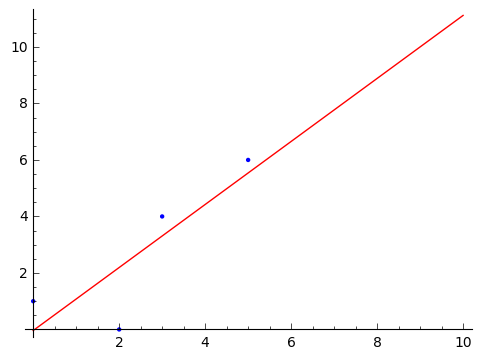

In [58]:
point(points)+plot(model.subs(fit),(x,0,10),color='red',figsize=5)

<h3>Splajny (GSL)</h3>

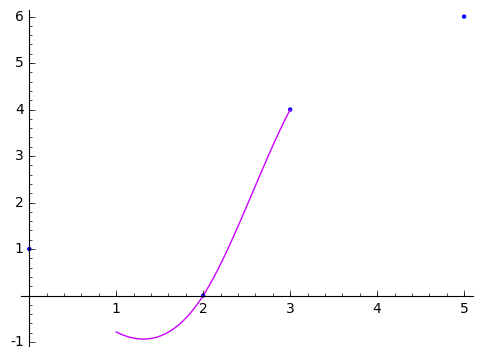

[[0, 1], [2, 0], [3, 4], [5, 6]]

In [59]:
s = spline(points)
show(point(points) + plot(s,1,3, hue=.8,figsize=5))
s.list()

In [60]:
points

[[0, 1], [2, 0], [3, 4], [5, 6]]

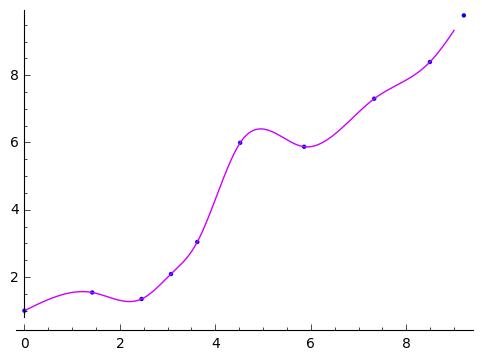

[(0, 1),
 (1/2*sin(1) + 1, cos(1) + 1),
 (1/2*sin(2) + 2, cos(4) + 2),
 (1/2*sin(3) + 3, cos(9) + 3),
 (1/2*sin(4) + 4, cos(16) + 4),
 (1/2*sin(5) + 5, cos(25) + 5),
 (1/2*sin(6) + 6, cos(36) + 6),
 (1/2*sin(7) + 7, cos(49) + 7),
 (1/2*sin(8) + 8, cos(64) + 8),
 (1/2*sin(9) + 9, cos(81) + 9)]

In [61]:
v = [(i + sin(i)/2, i+cos(i^2)) for i in range(10)]
s = spline(v)
show(point(v) + plot(s,0,9, hue=.8,figsize=5))
s.list()

<h3>Bezier</h3>

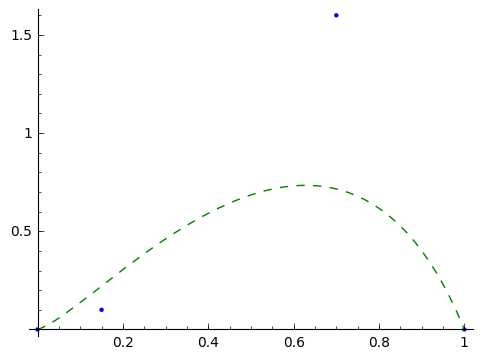

In [62]:
pts=[(0,0),(.15,.1),(0.7,1.6),(1,0)]
path = [pts]
curve = bezier_path(path, linestyle='dashed', rgbcolor='green',figsize=5)
curve+point(pts)

In [63]:
spline?